<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Predictive-models" data-toc-modified-id="Predictive-models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Predictive models</a></span><ul class="toc-item"><li><span><a href="#Random-Forests" data-toc-modified-id="Random-Forests-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Random Forests</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Logistic regression</a></span><ul class="toc-item"><li><span><a href="#With-smaller-subset-of-data" data-toc-modified-id="With-smaller-subset-of-data-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>With smaller subset of data</a></span><ul class="toc-item"><li><span><a href="#Grid-search" data-toc-modified-id="Grid-search-2.3.1.1"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>Grid search</a></span></li><li><span><a href="#Hyperopt" data-toc-modified-id="Hyperopt-2.3.1.2"><span class="toc-item-num">2.3.1.2&nbsp;&nbsp;</span>Hyperopt</a></span></li></ul></li><li><span><a href="#With-all-data" data-toc-modified-id="With-all-data-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>With all data</a></span><ul class="toc-item"><li><span><a href="#Grid-search" data-toc-modified-id="Grid-search-2.3.2.1"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>Grid search</a></span></li><li><span><a href="#Hyperopt" data-toc-modified-id="Hyperopt-2.3.2.2"><span class="toc-item-num">2.3.2.2&nbsp;&nbsp;</span>Hyperopt</a></span></li></ul></li></ul></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Support Vector Machine</a></span><ul class="toc-item"><li><span><a href="#Linear-SVM" data-toc-modified-id="Linear-SVM-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Linear SVM</a></span><ul class="toc-item"><li><span><a href="#With-smaller-subset-of-data" data-toc-modified-id="With-smaller-subset-of-data-2.4.1.1"><span class="toc-item-num">2.4.1.1&nbsp;&nbsp;</span>With smaller subset of data</a></span></li><li><span><a href="#With-whole-data-set" data-toc-modified-id="With-whole-data-set-2.4.1.2"><span class="toc-item-num">2.4.1.2&nbsp;&nbsp;</span>With whole data set</a></span></li></ul></li><li><span><a href="#SVM-with-RBF-Kernel" data-toc-modified-id="SVM-with-RBF-Kernel-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>SVM with RBF-Kernel</a></span><ul class="toc-item"><li><span><a href="#With-smaller-subset-of-data" data-toc-modified-id="With-smaller-subset-of-data-2.4.2.1"><span class="toc-item-num">2.4.2.1&nbsp;&nbsp;</span>With smaller subset of data</a></span></li><li><span><a href="#With-more-data" data-toc-modified-id="With-more-data-2.4.2.2"><span class="toc-item-num">2.4.2.2&nbsp;&nbsp;</span>With more data</a></span></li></ul></li><li><span><a href="#SVM-with-polynomial-kernel" data-toc-modified-id="SVM-with-polynomial-kernel-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>SVM with polynomial kernel</a></span><ul class="toc-item"><li><span><a href="#With-smaller-subset-of-data" data-toc-modified-id="With-smaller-subset-of-data-2.4.3.1"><span class="toc-item-num">2.4.3.1&nbsp;&nbsp;</span>With smaller subset of data</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Performance-comparison" data-toc-modified-id="Performance-comparison-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Performance comparison</a></span></li></ul></div>

In [1]:
import pdb 
import glob
import copy
import math
import pickle
import csv

import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, \
    StratifiedShuffleSplit, cross_val_score, StratifiedKFold, \
    GridSearchCV, RandomizedSearchCV

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, \
    LogisticRegressionCV, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, \
    precision_recall_curve, average_precision_score, f1_score, \
    roc_curve, auc, roc_auc_score, make_scorer,\
    accuracy_score, balanced_accuracy_score

from sklearn.externals import joblib
from sklearn.utils import resample
from sklearn.utils.fixes import signature

import missingno  # for visualizing missing data
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# Set up pandas table display
pd.set_option('display.width', 120)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Set plotting options
sns.set() # Use seaborn defaults for plotting
%matplotlib inline 


# Adjust number of CPU cores to use
n_jobs=2

## Preprocessing

In [2]:
# Load preprocessed training and test set, incl. feature names 
X_train = joblib.load('data_processed/X_train.joblib')
X_test = joblib.load('data_processed/X_test.joblib')
y_train = joblib.load('data_processed/y_train.joblib')
y_test = joblib.load('data_processed/y_test.joblib')
X_train_small = joblib.load('data_processed/X_train_small.joblib')
X_test_small = joblib.load('data_processed/X_test_small.joblib')
y_train_small = joblib.load('data_processed/y_train_small.joblib')
y_test_small = joblib.load('data_processed/y_test_small.joblib')
feature_names = joblib.load('data_processed/feature_names')
feature_names_small = joblib.load('data_processed/feature_names_small')

In [ ]:
# Load original data
with open('data_processed/all_data.pickle', 'rb') as pickled_file: 
    all_data = pickle.load(pickled_file)  

    
# Find categorical variables with more than 50 unique values and drop them
unique_values_cat = all_data.select_dtypes(include='object') \
                        .nunique() \
                        .sort_values(ascending=False) 
# Drop categorical variables with more than 50 categories
all_data = all_data.drop(unique_values_cat[unique_values_cat > 50].index,
                 axis='columns')


def split_preprocess(X=all_data.drop('default', axis='columns'),
                     y=all_data.default,
                     train_size=.8, test_size=.2):
    """
    Splits the data into training and test set of specified size, 
    then applies preprocessing.
    """
    
    # Train-test split 
    # ================
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y,
                         train_size=train_size, test_size=test_size,
                         random_state=1, shuffle=True, stratify=y) 

    # Preprocessing
    # =============
    # Imputation and standardization for numeric features
    numeric_features = X_train.select_dtypes(include=[np.number]).columns
    numeric_transformer = Pipeline(steps =[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())]) 

    # Imputation and one-hot encoding for categorical features
    categorical_features = X_train.select_dtypes(include=[object]).columns
    categorical_transformer = Pipeline(steps =[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    # Combining preprocessing for both kinds of features
    # (Features of other dtypes – in our case, boolean – will be
    # appended at the end without transformation.)
    # (Use only 1 core to avoid joblib error)
    preprocessor = ColumnTransformer(
        transformers=[
            ('numeric_transformer', 
                 numeric_transformer, numeric_features),
            ('categorical_transformer', 
                 categorical_transformer, categorical_features)],
        remainder='passthrough', n_jobs=1) 
    
    # Print dtypes of untransformed data
    print('data types of columns that were not transformed:\n {}'
            .format(X_train.select_dtypes(exclude=[np.number, object]) \
                    .dtypes.unique()))

    # Apply preprocessing
    X_train_p = preprocessor.fit_transform(X_train)
    X_test_p = preprocessor.transform(X_test)
   

    # Get feature names
    # =================
    # Names of categorical variables after one-hot encoding
    categorical_names = preprocessor \
        .named_transformers_['categorical_transformer'] \
        .named_steps['onehot'] \
        .get_feature_names()
    # Names of columns with other dtype (should only be Boolean)
    other_names = X_train \
        .select_dtypes(exclude=[np.number, object]) \
        .columns
    # Concatenate feature names (Note that list with names of 
    # numeric features was already created above)
    feature_names = list(numeric_features) + \
        list(categorical_names) + list(other_names) 

    
    # Return results
    # ==============
    return(X_train_p, X_test_p, y_train, y_test, feature_names)
  
    
# Create smaller training and test data to start out with
X_train_small, X_test_small, y_train_small, y_test_small, feature_names_small= \
    split_preprocess(train_size=20000, test_size=10000)

# Create full training and test set
X_train, X_test, y_train, y_test, feature_names = \
    split_preprocess(train_size=.8, test_size=.2)


# Save preprocessed training and test sets
filenames_whole = ['X_train', 'X_test', 'y_train', 'y_test']
filenames_small = [filename + '_small' for filename in filenames_whole]
filenames = filenames_whole + filenames_small
files = [X_train, X_test, y_train, y_test,
         X_train_small, X_test_small, y_train_small, y_test_small]

for file, filename in zip(files, filenames):
    joblib.dump(file,
                'data_processed/{}.joblib'.format(filename))
# Delete temporary list to conserve memory
del files

# Save feature names
joblib.dump(feature_names, 'data_processed/feature_names')
joblib.dump(feature_names_small, 'data_processed/feature_names_small')

## Predictive models

In [ ]:
# Dictionaries to store results for SMALL data set
# average_precision_1 = {}
classification_reports_1 = {}
most_important_features_1 = {} 
# Note that models with small data were estimated on a different subset
# of the observations, though the size stayed constant.  So don't use future 
# importance on these data, unless re-estimating models!

# Dictionaries to store results for WHOLE data set
# average_precision_2 = {}
classification_reports_2 = {}
most_important_features_2 = {}

In [46]:
# Calculate average precision
def print_save_ap(clf, model_name, X_test, y_test, 
                  X_train, y_train, validation_plot=False):
    """
    Calculates and prints average precision score on train and test set; 
    saves score from test set. Optionally plot how average precision 
    changed over iterations.
    """

    # Score classifier with the test data
    # Try if classifier supports probability
    try:
        y_score = clf.predict_proba(X_test)[:,1]
    # If it doesn't, use its decision function
    except AttributeError:
        y_score = clf.decision_function(X_test)
   
    # Calculate average precision
    ap_score = average_precision_score(y_test, y_score)
    ap_score_train = average_precision_score(y_test_train, y_score_train)
    
    # Save AP
    try:
        average_precision_hp[model_name] = ap_score
    # If dictionary to save AP doesn't exist yet, create it first
    except NameError:
        average_precision = {}
        average_precision[model_name] = ap_score
    
    # Print AP
    print('Best average precision score on *test* set: {}'.format(ap_score))
    print('Best average precision score on *training* set: {}'.format(ap_score))
    
    
    # Plot AP, if specified
    if validation_plot:
        # Load progress file with validation performance
        progress_file_path = 'hp_progress/progress_' + model_name + '.csv'
        progress_file = pd.read_csv(progress_file_path)

        # Extract AP for each iteration
        ap = - progress_file.loss
        ap.plot()
        plt.title('Performance on *Validation* Set')
        plt.ylabel('Average Precision')
        plt.xlabel('Iteration');

In [ ]:
# Function to carry out hyperparameter optimization
def find_best_hp(CLF, space, model_name,
                 X_train, y_train, 
                 n_folds=5, n_jobs=-1, max_evals=20):
    """Find best hyperparameters for a given classifier and search space."""
    
    # Trials object to track progress
    trials = Trials()

    # CSV file to track progress
    progress_file_path = 'hp_progress/progress_' + model_name + '.csv'
    with open(progress_file_path, 'w') as file:
        writer = csv.writer(file)
        # Write header to the file
        writer.writerow(['loss', 'params'])

    # Objective function to minimize
    def objective(params, CLF=CLF, progress_file_path=progress_file_path,
                  n_folds=n_folds, n_jobs=n_jobs):
        """Objective function to minimize"""

        # Instantiate CLF
        clf = CLF(**params)
        
        ## Generate indices is for cross-validation
        # If only one "fold" is desired, split into train and validation set
        if n_folds == 1: 
            cv = StratifiedShuffleSplit(n_splits=1, test_size=.2, 
                                        random_state=1)
        # Otherwise, generate indices for proper cross-validation split
        else:  
            cv = StratifiedKFold(n_folds, random_state=1)

        # Compute average precision through CV / validation set
        score = cross_val_score(clf, X_train, y_train, cv=cv,
                                scoring='average_precision', n_jobs=n_jobs)
        # Compute loss as the negative mean of the average precision scores
        # (since hyperopt can only minimize a function)
        loss = -score.mean()
        
        # Save results to csv file
        with open(progress_file_path, 'a') as file:
            writer = csv.writer(file)
            writer.writerow([loss, params])
        
        # Return results
        return {'loss': loss, 'params': params, 'status': STATUS_OK}
    
    # Minimize objective
    best = fmin(objective, space, algo=tpe.suggest,
                max_evals=max_evals, trials=trials)

    # Get the values of the optimal parameters
    best_params = space_eval(space, best)

    # Fit the model with the optimal hyperparamters
    clf = CLF(**best_params)
    clf.fit(X_train, y_train)
    
    # Save model to disk
    joblib.dump(clf, 'saved_models/' + model_name + '.joblib')
    
    # Print best parameters
    print(best_params)

### Random Forests

In [ ]:
space = {'n_estimators': hp.normal('n_estimators', 100),
          'max_depth': np.arange(20, 100),
          'max_features': np.arange(
              int(0.25 * sqrt_n_ft), int(1.5 * sqrt_n_ft)),
          'min_samples_leaf': np.arange(1, 200)}



space = {'n_estimators': np.arange(50, 750),
          'max_depth': np.arange(20, 100),
          'max_features': np.arange(
              int(0.25 * sqrt_n_ft), int(1.5 * sqrt_n_ft)),
          'min_samples_leaf': np.arange(1, 200)}

N_JOBS = 3
# Find best hyperparameters
find_best_hp(RandomForestClassifier, space, model_name='rf_hp_1',
              X_train=X_train_small, y_train=y_train_small,
              max_evals=2, n_jobs=2, n_folds=3,)

In [ ]:
%%time

# Fit random forest with default parameters
rf_2 = RandomForestClassifier(n_estimators=100, 
        oob_score=False, n_jobs=N_JOBS, random_state=1,
        class_weight='balanced_subsample')
rf_2.fit(X_train, y_train)

# Predictions of class and probability
y_pred_rf_2 = rf_2.predict(X_test) 
y_pred_proba_rf_2 = rf_2.predict_proba(X_test)[:, 1]

In [ ]:
print_save_ap(rf_2, 'rf_2', X_test, y_test)

In [ ]:
N_JOBS = 3
# Compute sqrt of number of features for baseline max_features
sqrt_n_ft = np.sqrt(X_train.shape[1])
sqrt_n_ft

# Parameters to search over (uniform distributions)
param_distributions = {'n_estimators': np.arange(50, 750),
                      'max_depth': np.arange(20, 100),
                      'max_features': np.arange(
                          int(0.25 * sqrt_n_ft), int(1.5 * sqrt_n_ft)),
                      'min_samples_leaf': np.arange(1, 200)}
# Randomized  search
rf = RandomForestClassifier()
rf_rs_2 = RandomizedSearchCV(rf, param_distributions=param_distributions, 
                       scoring='average_precision',
                       return_train_score=False, random_state=1,
                       n_jobs=N_JOBS, cv=5, n_iter=100)
rf_rs_2.fit(X_train, y_train) 

# Save model to disk
joblib.dump(rf_rs_2, 'saved_models/rf_rs_2.joblib')

In [ ]:
# Load model
rf_rs_1 = joblib.load('saved_models/rf_rs_1.joblib')

In [ ]:
rf_rs_2.best_params_

In [ ]:
sqrt_n_ft

In [ ]:
print_save_ap(rf_rs_2, 'rf_rs_2', X_test, y_test)

In [ ]:
print_save_ap(rf, 'rf', X_test, y_test)

In [ ]:
average_precision

###  XGBoost

Since we have a lot of parameters to tune, we need a smart way of searching over the different parameters that avoids the combinatorial explosion that would result from a simultaneous grid search over all parameters.  

In the following, I will follow the suggestions from https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ for plausible ranges for the hyperparameters.  However, since I will use Bayesian optimization rather than brute force, I am able to avoid having to repeatedly optimize a small number of parameters at a time. Instead, I will optimize all tree-specific parameters at once, using a relatively higher learning rate to speed up training. Subsequently, I will reestimate the model on the training set with the parameters identified in the previous step, but use a smaller learning rate for increased accuracy. 

During both of the steps, I will use early stopping to determine the optimal number of trees.  To that end, I split off a quarter of the original training set to use as the validation set for early stopping. Since the original training set has about 200,000 observations, we will still have around 150,000 observations left as the new test set for the final XGBoost classifier. This is more than enough to measure performance with very high accuracy.

I will be using XGBoost's native API rather than the Scikit-learn API. This has several benefits, such as being able to use SGBoost's native data format, which increases performance.  Thus, let's start by converting the data.

In [3]:
# Remove "<" from feature names, since this causes problems for xgboost
feature_names_xgb = [x.replace('<', '_less_than_') for x in feature_names]


# Split original test set into validation set (for early stopping) and new test set
X_val_xgb, X_test_xgb, y_val_xgb, y_test_xgb = \
    train_test_split(X_test, y_test,
                     train_size=0.25, test_size=0.75,
                     random_state=1, shuffle=True, stratify=y_test) 

# Convert data to DMatrix 
data_xgb_train = xgb.DMatrix(data=X_train, label=y_train,
                             feature_names=feature_names_xgb, nthread=-1)
data_xgb_test = xgb.DMatrix(data=X_test_xgb, label=y_test_xgb,
                            feature_names=feature_names_xgb)
data_xgb_val = xgb.DMatrix(data=X_val_xgb, label=y_val_xgb,
                            feature_names=feature_names_xgb)

Since we are not using the sklearn API, we won't be able to reuse the function defined above for Bayesian hyperparameters optimization. Instead, let's adapt the code for XGBoost.

For most parameters, we will use a normal distribution to define their prior distributions to sample from.  Thus, setting the mean and standard deviation for these distributions is pretty straightforward.  However, for the regularization term alpha, we will use a lognormal distribution (analogous to using a logarithmic grid for a brute force search). Since the relationship between its parameters and the scale of the distribution is less intuitive, let's draw a few samples first to inspect if it yields a plausible distribution for the regularization term.

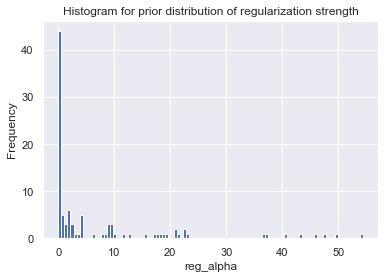

Descriptive statistics:
 count    100.000000
mean       7.647200
std       12.817076
min        0.002542
25%        0.068217
50%        1.251402
75%        9.318613
max       54.344284
dtype: float64


In [49]:
# Inspect prior distribution for reg_alpha
from hyperopt import pyll
reg_alpha_distr = hp.loguniform('n_estimators', -6, 4)
samples = [pyll.stochastic.sample(reg_alpha_distr) for i in range(100)]

# Plot
# sns.distplot(pd.Series(samples))
pd.Series(samples).plot(kind='hist', bins=100)
plt.xlabel('reg_alpha')
plt.title('Histogram for prior distribution of regularization strength')
plt.show()

# Descriptive statistics
print('Descriptive statistics:\n', 
      pd.Series(samples).describe())

Looking at the minimum, maximum, and median, these values look good, so let's go with these parameters.

How let's decide on an appropriate prior distribution for gamma, the minimum loss reduction that we require to further partition a node. I will use a lognormal distribution bounded between 0 and 0.5.  The challenge is to define this in hyperopt, because it bounds the distribution by the exponential function of the upper and lower bounds supplied as the parameters. Thus, in order to get a lower bound of 0, we would have to pass log(0) or -$\infty$ as the parameter. I solved this problem by passing the log of a small number as the lower bound, and then subtract the small number from the final distribution when adjusting the parameters.

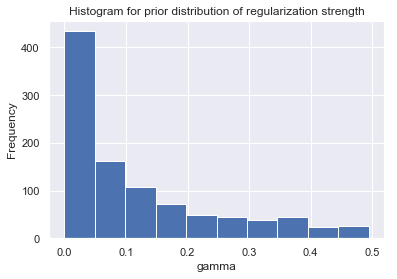

Descriptive statistics:
 count    1000.000000
mean        0.117692
std         0.128395
min         0.000022
25%         0.016077
50%         0.070008
75%         0.175608
max         0.494426
dtype: float64


In [4]:
# Inspect prior distribution for gamma
from hyperopt import pyll
small_number = 0.01

gamma_distr = hp.loguniform('n_estimators', 
                            np.log(small_number), 
                            np.log(0.5 + small_number))

samples = [pyll.stochastic.sample(gamma_distr) - small_number
               for i in range(1000)]

# Plot
# sns.distplot(pd.Series(samples))
pd.Series(samples).plot(kind='hist')
plt.xlabel('gamma')
plt.title('Histogram for prior distribution of regularization strength')
plt.show()

# Descriptive statistics
print('Descriptive statistics:\n', 
      pd.Series(samples).describe())

In [5]:
small_number = 0.01 # To adjust lower bound for Gamma
space = {
    # Parameters that we are going to tune (Note that these may be modified
    # in objective function to convert to integer or to set min or max.)
    'eta':.3,  # Start with a higher learning rate for speed
    'objective':'binary:logistic',
    'eval_metric':'map',
    'scale_pos_weight': 5,  # Balance classes
    'max_depth': hp.normal('max_depth', 6, 2),
    'min_child_weight': hp.normal('min_child_weight', 4, 2), 
    'gamma': hp.loguniform('gamma', # small number will be subtracted later
                            np.log(small_number), 
                            np.log(0.5 + small_number)),
    'subsample': hp.normal('subsample', 0.75, 0.2), 
    'colsample_bytree':  hp.normal('colsample_bytree', 0.75, 0.2),
    'reg_alpha': hp.loguniform('reg_alpha', -6, 4),
    'verbose_eval': False,
    'nthread': 3
}

In [8]:
# Set options
N_JOBS=3
MAX_EVALS = 1

# CSV file to track progress
progress_file_path = 'hp_progress/progress_xgb.csv'
with open(progress_file_path, 'w') as file:
    writer = csv.writer(file)
    # Write header to the file
    writer.writerow(['loss', 'params', 'n_trees'])

    
# Function to convert sampled parameters to integer or make positive, etc., 
# where necessary
def adjust_params_xgb(params):
    """ 
    Adjust parameters where hyperopt did not allow sampling from optimal 
    distribution.
    """

    # Convert sampled parameters to integer, where  applicable
    params['max_depth'] = round(params['max_depth'])
    
    # Make sure min_child_weight is positive
    if params['min_child_weight'] <= 0:
        params['min_child_weight'] = 0 # Set to lower bound
   
    # Subtract the small number from gamma to set 0 as lower bound
    params['gamma'] = params['gamma'] - small_number

    # Set min or max thresholds for parameters, where applicable
    if params['max_depth'] <= 2:
        params['max_depth'] = 2
    if params['subsample'] < 0:
        params['subsample'] = 0
    if params['subsample'] > 1:
        params['subsample'] = 1
    if params['colsample_bytree'] < 0: 
        params['colsample_bytree'] = 0
    if params['colsample_bytree'] > 1:
        params['colsample_bytree'] = 0.75
    
    # Return modified parameters
    return params


# Objective function to minimize
def objective(params, progress_file_path=progress_file_path,
              n_jobs=N_JOBS):
    """Objective function to minimize"""
    
    # Adjust parameters
    params = adjust_params_xgb(params)
    
    # Train model
    xgb_ = xgb.train(params, dtrain=data_xgb_train, 
                num_boost_round=1000,
                evals=[(data_xgb_val, "val")], 
                early_stopping_rounds=50)
    
    # Compute loss as the negative mean of the average precision scores
    # (since hyperopt can only minimize a function)
    loss = - xgb_.best_score
    
    # Save results to csv file
    with open(progress_file_path, 'a') as file:
        writer = csv.writer(file)
        writer.writerow([loss, params, xgb_.best_ntree_limit])

    # Return results
    return {'loss': loss, 'params': params, 'n_trees': xgb_.best_ntree_limit, 'status': STATUS_OK}

Now we are ready to carry out the hyperparameters optimization:

In [10]:
%%prun

# Minimize objective
best = fmin(objective, space, algo=tpe.suggest,
            max_evals=MAX_EVALS)

# Get the values of the optimal parameters
best_params = space_eval(space, best)

[10:35:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[0]	val-map:0.334662
Will train until val-map hasn't improved in 50 rounds.
[10:35:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[1]	val-map:0.349399
[10:35:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[2]	val-map:0.354619
[10:35:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[3]	val-map:0.359672
[10:35:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[4]	val-map:0.363973
[10:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree 

[10:36:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[48]	val-map:0.394896
[10:36:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[49]	val-map:0.395113
[10:36:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[50]	val-map:0.395304
[10:36:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[51]	val-map:0.395375
[10:37:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[52]	val-map:0.395354
[10:37:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nod

[10:38:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[96]	val-map:0.398392
[10:38:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[97]	val-map:0.398331
[10:38:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[98]	val-map:0.39843
[10:38:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[99]	val-map:0.39851
[10:38:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[100]	val-map:0.398823
[10:38:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned node

[10:40:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[144]	val-map:0.399558
[10:40:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[145]	val-map:0.399593
[10:40:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[146]	val-map:0.399499
[10:40:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[147]	val-map:0.399322
[10:40:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[148]	val-map:0.399238
[10:40:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 prune

In [ ]:
# Load full results from progress file
xgb_results = pd.read_csv('hp_progress/progress_xgb.csv')

# Get validation score
# Extract AP for each iteration
ap_xgb = - xgb_results.loss

print(f'Best average precision on validation set: {ap_xgb.max()}')

# Plot AP per iteration
ap_xgb.plot()
plt.title('Performance on validation set')
plt.ylabel('Average Precision')
plt.xlabel('Iteration');

Now that we have identified the best parameters, let's re-estimate the model with a lower learning rate to get another boost in accuracy.

In [ ]:
# Decrease learning rate
best_params['eta'] = 0.005

# Adjust parameters (e.g., convert to integer)
best_params = adjust_params_xgb(best_params)

# Fit the model with the optimal hyperparamters and lower learning rate
xgb_best = xgb.train(best_params,
                    dtrain=data_xgb_train, 
                    num_boost_round=10000,
                    evals=[(data_xgb_val, "val")], 
                    early_stopping_rounds=50) 

In [ ]:
xgb_best.best_score    

In [ ]:
xgb_best.best_ntree_limit

In [ ]:
## Compute test score of final model
# Make predicition
y_xgb = xgb_best.predict(data_xgb_test)
y_xgb

# Save and print AP
ap_xgb = average_precision_score(y_test_xgb, y_xgb)
print(f'Average precision on test set: {ap_xgb}')
# average_precision['xgb'] = ap_xgb

In [ ]:
best_params

In [ ]:
# Add optimum number of trees to best parameters
best_params['num_boost_round'] = xgb_best.best_ntree_limit
# Remove early stopping, because now we don't need it anymore
best_params['early_stopping_rounds'] = None

In [ ]:
# Save feature importances
fi_xgb = pd.Series(xgb_best.get_fscore()) \
            .sort_values(ascending=False)
feature_importances = {}
feature_importances['xgb'] = fi_xgb
fi_xgb

In [ ]:
feature_importances

### Logistic regression
#### With smaller subset of data

#####  Grid search

In [ ]:
lr_1 = SGDClassifier(loss='log', penalty='elasticnet', 
                      class_weight='balanced', 
                      max_iter=1000, tol=1E-3, # those are defaults for sklearn 0.21+
                      random_state=1, n_jobs=N_JOBS) 

# Parameters to search over
param_grid = {'l1_ratio': np.linspace(0, 1, 11),
              'alpha': np.logspace(-6, 1, 8)}
# Grid search
lr_gs_1 = GridSearchCV(lr_1, param_grid=param_grid, 
                       scoring='average_precision',
                       return_train_score=True,
                       n_jobs=N_JOBS, cv=3)
lr_gs_1.fit(X_train_small, y_train_small) 

# Save model
joblib.dump(lr_gs_1, 'saved_models/lr_gs_1.joblib')

In [ ]:
# Load model
lr_gs_1 = joblib.load('saved_models/lr_gs_1.joblib')

In [ ]:
def gs_best_result(gridsearchcv, decimals=3):
    """Returns details for best results from grid search."""

    # Get mean validation scores
    scores = pd.DataFrame(gridsearchcv.cv_results_) \
                .drop('params', axis='columns')
    
    # Get values for hyperparameters 
    params = pd.DataFrame(
        gridsearchcv.cv_results_['params'])
    
    # Concatenate validation scores and hyperparameters 
    scores_w_params = pd.concat([params, scores], axis=1)
    # Set hyperparameters as index
    scores_w_params = scores_w_params \
                        .set_index(params.columns.tolist())
    
    # Get tuple with best hyperparameters values, making sure it 
    # has the same order as the multi-index.
    best_param_tuple = (
        gridsearchcv.best_params_[scores_w_params.index.names[0]],
        gridsearchcv.best_params_[scores_w_params.index.names[1]])
    
    # Filter results for best hyperparameters 
    best_result = pd.to_numeric(
                    scores_w_params.loc[best_param_tuple, :])
    
    # Return rounded result (convert to dataframe for pretty  printing)
    return(pd.DataFrame(best_result) \
               .round(decimals))

gs_best_result(lr_gs_1)

In [ ]:
# Predictions
y_pred_lr_1= lr_gs_1.predict(X_test_small)    
y_pred_proba_lr_1= lr_gs_1.predict_proba(X_test_small)[:, 1]

# Save results
average_precision_1['logistic regression'] = \
    average_precision_score(y_test_small, y_pred_proba_lr_1)
classification_reports_1['logistic regression'] = \
    classification_report(y_test_small, y_pred_lr_1)

# Compute feature importance and sort
most_important_features_1['logistic regression'] = \
    pd.Series(lr_gs_1.best_estimator_.coef_[0], 
          index=feature_names_small) \
    .sort_values(ascending=False) \
    .iloc[: 10] 

In [ ]:
# Visualize grid search results
def gs_heatmap(gridsearchcv, x_digits=0, y_digits=0,
               x_scientific_notation=True, y_scientific_notation=True):
    """Visualizes validation accuracy from grid search over two hyperparameters."""
    
    # Print test score and  hyperparameters
    print('Best score: {:.3f}, best hyperparameters: '
                .format(gridsearchcv.best_score_), 
          gridsearchcv.best_params_)
      
    # Get mean validation scores
    scores = pd.DataFrame(
        gridsearchcv.cv_results_['mean_test_score'])
    # Get values for hyperparameters
    params = pd.DataFrame(
        gridsearchcv.cv_results_['params'])
    # Concatenate validation scores and hyperparameters 
    scores_w_params = pd.concat([params, scores], 
                                  axis=1)
    # Set first two columns, which correspond to parameters, as index.
    # Then unstack.
    index_cols = list(scores_w_params.columns)[:2]
    scores_2d = scores_w_params.set_index(index_cols) \
                    .squeeze() \
                    .unstack()
    
    # Create desired formatting string for axes (scientific notation and digits)
    if x_scientific_notation == True:
        x_notation = 'E' 
    else: 
        x_notation = 'F'
    x_formatting = '{:.' + str(x_digits) + x_notation + '}'

    if y_scientific_notation == True:
        y_notation = 'E' 
    else: 
        y_notation = 'F'
    y_formatting = '{:.' + str(y_digits) + y_notation + '}'

    # Plot
    fig, ax = plt.subplots()
    sns.heatmap(scores_2d, ax=ax,
                xticklabels=[x_formatting.format(x) for  x in scores_2d.columns],
                yticklabels=[y_formatting.format(y) for y in scores_2d.index])
    ax.set_title('Validation accuracy')
    

In [ ]:
gs_heatmap(lr_gs_1, x_digits=1, x_scientific_notation=False)

In [ ]:
average_precision_1

##### Hyperopt

In [ ]:
space = {
    'loss': 'log',
    'penalty': 'elasticnet',
    'class_weight': 'balanced',
    'max_iter': 1000,
    'tol':1E-3,
    'random_state': 1,
    'alpha': hp.loguniform('alpha', -6, 1),
    'l1_ratio': hp.uniform('l1_ratio', 0, 1)
}

# Find best hyperparameters
find_best_hp(SGDClassifier, space, model_name='lr_hp_1',
              X_train=X_train_small, y_train=y_train_small,
              max_evals=8*11, n_jobs=3, n_folds=3,)

Performance: 0.37503654872776293

In [ ]:
# Load model
lr_hp_1 = joblib.load('saved_models/lr_hp_1.joblib')

In [ ]:
progress_lr = pd.read_csv('hp_progress/progress_lr.csv')

In [ ]:
# Best average precision score on validation set
-progress_lr.loss.min()

We see that the best performance on the test set, 0.378, is slightly higher than what we found with a grid search, .375. Though this difference is only small, but note that this was achieved with the same number of iterations. Thus, let's take a look at how the performance changed with the number of iterations, to see if we already reached a plateau earlier.

In [ ]:
ap = - progress_lr.loss
ap.plot()
plt.title('Performance on Validation Set')
plt.ylabel('Average Precision')
plt.xlabel('Iteration');

This plot shows nicely how the Bayesian search algorithm has an intelligent approach towards the exploration-exploitation dilemma: For the first 20 or so iterations, it focuses on *exploration*: It searches the hyperparameter space seemingly randomly, resulting in both very high and very low performance. Later, it shifts to *exploitation*: Having identified values for the hyperparameters that work well, it shifts to predominantly searching around these values, resulting in more consistent high performance.  Nevertheless, it occasionally shifts back to exploring values further away, in order to avoid getting stuck in a local maximum.

We also see that there does not seem to be much payoff from further optimization once reasonably good values have been found: The best values found during the first 10 iterations are not far off from the overall maximum. Thus, when we ran the hyperparameters optimization on the full data set, we will only let the algorithm run for 40 iteration, since the performance reaches a plateau starting at around 20 iterations.

#### With all data

##### Grid search

Let's now estimate the model on all data. Based on the results from the smaller data set, we will adjust the parameter grade for alpha, the constant that multiplies the regularization term: We will drop all values for alpha greater than 0.1, since these did not give us good performance. 

Because we are now using more data, the optimal regularization term will be even smaller; thus, we leave the minimum value for alpha to search over constant, even though it did not give us great performance either on the smaller data. 

In [ ]:
# Logistic regression (Elastic Net) 
# ---------------------------------
n_jobs=2
lr_2 = SGDClassifier(loss='log', penalty='elasticnet', 
                      class_weight='balanced', 
                      max_iter=1000, tol=1E-3, # those are defaults for sklearn 0.21+
                      random_state=1, n_jobs=N_JOBS) 

# Parameters to search over
param_grid = {'l1_ratio': np.linspace(0, 1, 11),
              'alpha': np.logspace(-6, 0, 13)}

# Grid search
lr_gs_2 = GridSearchCV(lr_2, param_grid=param_grid, 
                       scoring='average_precision',
                       return_train_score=True,
                       n_jobs=N_JOBS, cv=5)
lr_gs_2.fit(X_train, y_train) 

# Save model

joblib.dump(lr_gs_2, 'saved_models/lr_gs_2.joblib')

In [ ]:
# Load model
lr_gs_2 = joblib.load('saved_models/lr_gs_2.joblib')

In [ ]:
print_save_ap(lr_gs_2, 'lr_gs_2', X_test, y_test)

In [ ]:
# # Predictions
# y_pred_lr_2 = lr_gs_2.predict(X_test)
# y_pred_proba_lr_2 = lr_gs_2.predict_proba(X_test)[:, 1]

# # Save results
# average_precision_2['logistic regression'] = \
#     average_precision_score(y_test, y_pred_proba_lr_2)
# classification_reports_2['logistic regression'] = \
#     classification_report(y_test, y_pred_lr_2)

In [ ]:
print_save_ap(lr_gs_2, 'lr_gs_2', X_test_small, y_test_small)

In [ ]:
# Compute feature importance and sort
most_important_features_2['logistic regression'] = \
    pd.Series(lr_gs_2.best_estimator_.coef_[0], 
          index=feature_names) \
    .sort_values(ascending=False) \
    .iloc[: 10] 

In [ ]:
# Visualize grid search results    
gs_heatmap(lr_gs_2, x_digits=1, x_scientific_notation=False)

In [ ]:
print(classification_reports_2['logistic regression'])

##### Hyperopt

In [ ]:
# Search space
space = {
    'loss': 'log',
    'penalty': 'elasticnet',
    'class_weight': 'balanced',
    'max_iter': 1000,
    'tol':1E-3,
    'random_state': 1,
    'alpha': hp.loguniform('alpha', -6, 0),
    'l1_ratio': hp.uniform('l1_ratio', 0, 1)
}

# Find best hyperparameters
find_best_hp(SGDClassifier, space, model_name='lr_hp_2',
              X_train=X_train, y_train=y_train,
              max_evals=40, n_jobs=3, n_folds=5)

In [ ]:
# Load model
lr_hp_2 = joblib.load('saved_models/lr_hp_2.joblib')

In [ ]:
print_save_ap(lr_hp_2, 'lr_hp_2', X_test, y_test, validation_plot=True)

### Support Vector Machine
#### Linear SVM

##### With smaller subset of data

###### Grid search

In [ ]:
# Linear SVM
# ----------
# Elastic net, logistic regression (Loss='hinge')
svm_lin_1 = SGDClassifier(loss='hinge', penalty='elasticnet', random_state=1,
                          max_iter=1000, tol=1E-3,
                          class_weight='balanced', n_jobs=N_JOBS) 

# Parameters to search over
param_grid = {'l1_ratio': np.linspace(0, 1, 3),
              'alpha': np.logspace(-5, 1, 7)}
svm_lin_gs_1 = GridSearchCV(svm_lin_1, param_grid=param_grid,
                          scoring='average_precision',
                          return_train_score=True,       
                          n_jobs=N_JOBS, cv=5)
svm_lin_gs_1.fit(X_train_small, y_train_small)

# Save model
joblib.dump(svm_lin_gs_1, 'saved_models/svm_lin_gs_1.joblib')

In [ ]:
### Load model
svm_lin_gs_1 = joblib.load('saved_models/svm_lin_gs_1.joblib')

In [ ]:
# Prediction of class
y_pred_svm_lin_1 = svm_lin_gs_1.predict(X_test_small)
# Distance from separating hyperplane
y_pred_distance_svm_lin_1 = svm_lin_gs_1.decision_function(X_test_small)

# Save results
average_precision_1['SVM (Linear Kernel)'] = \
    average_precision_score(y_test_small, y_pred_distance_svm_lin_1)
classification_reports_1['SVM (Linear Kernel)'] = \
    classification_report(y_test_small, y_pred_svm_lin_1)

# Visualize grid search results
gs_heatmap(svm_lin_gs_1, x_digits=1, x_scientific_notation=False)

In [ ]:
average_precision_1

###### Hyperopt

In [ ]:
# Search space
space = {
    'loss': 'hinge',
    'penalty': 'elasticnet',
    'class_weight': 'balanced',
    'max_iter': 1000,
    'tol':1E-3,
    'random_state': 1,
    'alpha': hp.loguniform('alpha', -6, 1),
    'l1_ratio': hp.uniform('l1_ratio', 0, 1)
}

# Find best hyperparameters
find_best_hp(
      SGDClassifier, space, model_name='svm_lin_hp_1',
      X_train=X_train_small, y_train=y_train_small,
      max_evals=8*11, n_jobs=3, n_folds=3)

In [ ]:
progress_lr = pd.read_csv('progress_lr.csv')

In [ ]:
# Best average precision score on validation set
-progress_lr.loss.min()

In [ ]:
ap = - progress_lr.loss
ap.plot()
plt.title('Performance on Validation Set')
plt.ylabel('Average Precision')
plt.xlabel('Iteration');

  ##### With whole data set

We will now repeat this analysis on the whole data set. Again, since more data will require less regularization, we will look at lower our maximum value for alpha to 0.1

In [ ]:
# Linear SVM
# ----------
# Elastic net, logistic regression (Loss='hinge')
svm_lin_2 = SGDClassifier(loss='hinge', penalty='elasticnet', random_state=1,
                          max_iter=1000, tol=1E-3,
                          class_weight='balanced', n_jobs=N_JOBS) 

# Parameters to search over
param_grid = {'l1_ratio': np.linspace(0, 1, 11),
              'alpha': np.logspace(-5, -1, 9)}
svm_lin_gs_2 = GridSearchCV(svm_lin_2, param_grid=param_grid,
                          scoring='average_precision',
                          return_train_score=True,       
                          n_jobs=N_JOBS, cv=5)
svm_lin_gs_2.fit(X_train, y_train)

# Save model
joblib.dump(svm_lin_gs_2, 'saved_models/svm_lin_gs_2.joblib')

In [ ]:
# Load model
svm_lin_gs_2 = joblib.load('saved_models/svm_lin_gs_2.joblib')

In [ ]:
# Prediction of class
y_pred_svm_2 = svm_lin_gs_2.predict(X_test)
# Distance from separating hyperplane
y_pred_distance_svm_2 = svm_lin_gs_2.decision_function(X_test)

# Save results
average_precision_2['SVM (Linear Kernel)'] = \
    average_precision_score(y_test, y_pred_distance_svm_2)
classification_reports_2['SVM (Linear Kernel)'] = \
    classification_report(y_test, y_pred_svm_2)

# Visualize grid search results
gs_heatmap(svm_lin_gs_2, x_digits=1, x_scientific_notation=False)

In [ ]:
# Get AP score
print_save_ap(svm_lin_gs_2, 'svm_lin_gs_2', X_test, y_test)

###### Hyperopt

In [ ]:
# Search space
space = {
    'loss': 'hinge',
    'penalty': 'elasticnet',
    'class_weight': 'balanced',
    'max_iter': 1000,
    'tol':1E-3,
    'random_state': 1,
    'alpha': hp.loguniform('alpha', -5, -1),
    'l1_ratio': hp.uniform('l1_ratio', 0, 1)
}

# Find best hyperparameters
find_best_hp(
      SGDClassifier, space, model_name='svm_lin_hp_2',
      X_train=X_train, y_train=y_train,
      max_evals=40, n_jobs=3, n_folds=5)

In [ ]:
# Load model
svm_lin_hp_2 = joblib.load('saved_models/svm_lin_hp_2.joblib')

In [ ]:
print_save_ap(svm_lin_hp_2, 'svm_lin_hp_2', X_test, y_test, validation_plot=True)

#### SVM with RBF-Kernel

In [29]:
# Create smaller subsets 
X_train_s, y_train_s = resample(
    X_train, y_train, 
    replace=False, n_samples=500, random_state=1)
    
X_test_s, y_test_s = resample(
    X_test, y_test, 
    replace=False, n_samples=500, random_state=1)

In [30]:

pca = PCA(n_components=30)
X_train_pc = pca.fit_transform(X_train_s) 
X_test_pc = pca.transform(X_test_s)

In [31]:
# Function to carry out hyperparameter optimization
def find_best_hp(CLF, space, model_name,
                 X_train, y_train, 
                 n_folds=5, n_jobs=-1, max_evals=20):
    """Find best hyperparameters for a given classifier and search space."""
    
    # Trials object to track progress
    trials = Trials()

    # CSV file to track progress
    progress_file_path = 'hp_progress/progress_' + model_name + '.csv'
    with open(progress_file_path, 'w') as file:
        writer = csv.writer(file)
        # Write header to the file
        writer.writerow(['loss', 'params'])

    # Objective function to minimize
    def objective(params, adjust_params, CLF=CLF, progress_file_path=progress_file_path,
                  n_folds=n_folds, n_jobs=n_jobs):
        """Objective function to minimize"""

        # Instantiate CLF
        clf = CLF(**params)
        
        ## Generate indices is for cross-validation
        # If only one "fold" is desired, split into train and validation set
        if n_folds == 1: 
            cv = StratifiedShuffleSplit(n_splits=1, test_size=.2, 
                                        random_state=1)
        # Otherwise, generate indices for proper cross-validation split
        else:  
            cv = StratifiedKFold(n_folds, random_state=1)

        # Compute average precision through CV / validation set
        score = cross_val_score(clf, X_train, y_train, cv=cv,
                                scoring='average_precision', n_jobs=n_jobs)
        # Compute loss as the negative mean of the average precision scores
        # (since hyperopt can only minimize a function)
        loss = -score.mean()
        
        # Save results to csv file
        with open(progress_file_path, 'a') as file:
            writer = csv.writer(file)
            writer.writerow([loss, params])
        
        # Return results
        return {'loss': loss, 'params': params, 'status': STATUS_OK}
    
    # Minimize objective
    best = fmin(objective, space, algo=tpe.suggest,
                max_evals=max_evals, trials=trials)

    # Get the values of the optimal parameters
    best_params = space_eval(space, best)

    # Fit the model with the optimal hyperparamters
    clf = CLF(**best_params)
    clf.fit(X_train, y_train)
    
    # Save model to disk
    joblib.dump(clf, 'saved_models/' + model_name + '.joblib')
    
    # Print best parameters
    print(best_params)
    
    

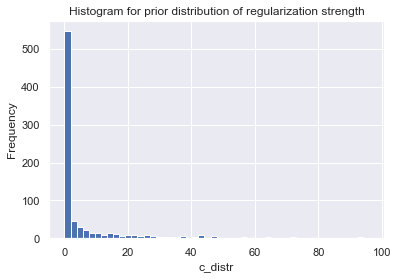

Descriptive statistics:
 count    8.180000e+02
mean     7.496773e+00
std      1.674293e+01
min      1.034089e-07
25%      1.828256e-02
50%      3.657970e-01
75%      5.266221e+00
max      9.586310e+01
dtype: float64


In [32]:
# Inspect prior distribution for reg_alpha
from hyperopt import pyll
c_distr = hp.lognormal('C', 0, 5)
samples = [pyll.stochastic.sample(c_distr) for i in range(1000)]
# 
samples = list(filter(lambda x: x<100, samples))
# Plot
# sns.distplot(pd.Series(samples))
pd.Series(samples).plot(kind='hist', bins=50)
# plt.xlim([0,1000])
plt.xlabel('c_distr')
plt.title('Histogram for prior distribution of regularization strength')
plt.show()

# Descriptive statistics
print('Descriptive statistics:\n', 
      pd.Series(samples).describe())

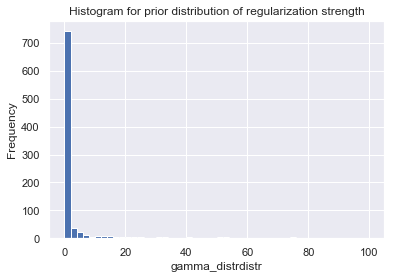

Descriptive statistics:
 count    9.130000e+02
mean     4.201590e+00
std      1.313622e+01
min      2.372654e-10
25%      4.967344e-04
50%      2.613030e-02
75%      8.495362e-01
max      9.986400e+01
dtype: float64


In [41]:
# Inspect prior distribution for reg_alpha
from hyperopt import pyll
gamma_distrdistr = hp.lognormal('C', np.log(1/30), 6)
samples = [pyll.stochastic.sample(gamma_distrdistr) for i in range(1000)]
# 
samples = list(filter(lambda x: x<100, samples))
# Plot
# sns.distplot(pd.Series(samples))
pd.Series(samples).plot(kind='hist', bins=50)
# plt.xlim([0,1000])
plt.xlabel('gamma_distrdistr')
plt.title('Histogram for prior distribution of regularization strength')
plt.show()

# Descriptive statistics
print('Descriptive statistics:\n', 
      pd.Series(samples).describe())

In [42]:
def adjust_params_svm_rbf(params):
    """ 
    Adjust parameters where hyperopt did not allow sampling from optimal 
    distribution.
    """

    # Set min or max thresholds for parameters, where applicable
    if params['C'] >= 10:
        params['C'] = 10
        
    # Return modified parameters
    return params

In [34]:
# import csv
# from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
# from sklearn.model_selection import cross_val_score, StratifiedKFold

In [43]:
# Function to carry out hyperparameter optimization
def find_best_hp(CLF, space, model_name, 
                 X_train, y_train, 
                 adjust_params=None,n_folds=5, n_jobs=-1, max_evals=20):
    """Find best hyperparameters for a given classifier and search space."""
    
    # Trials object to track progress
    trials = Trials()

    # CSV file to track progress
    progress_file_path = 'hp_progress/progress_' + model_name + '.csv'
    with open(progress_file_path, 'w') as file:
        writer = csv.writer(file)
        # Write header to the file
        writer.writerow(['loss', 'params'])

    # Objective function to minimize
    def objective(params, CLF=CLF, 
                  progress_file_path=progress_file_path,
                  n_folds=n_folds, n_jobs=n_jobs):
        """Objective function to minimize"""
#         pdb.set_trace()
        # Adjust parameters, if specified
        if adjust_params is not None:
            params = adjust_params(params)
    
        # Instantiate CLF
        clf = CLF(**params)
        
        ## Generate indices for cross-validation
        # If only one "fold" is desired, split into train and validation set
        if n_folds == 1: 
            cv = StratifiedShuffleSplit(n_splits=1, test_size=.2, 
                                        random_state=1)
        # Otherwise, generate indices for proper cross-validation split
        else:  
            cv = StratifiedKFold(n_folds, random_state=1)

        # Compute average precision through CV / validation set
        score = cross_val_score(clf, X_train_pc, y_train, cv=cv,
                                scoring='average_precision', n_jobs=n_jobs)
        # Compute loss as the negative mean of the average precision scores
        # (since hyperopt can only minimize a function)
        loss = -score.mean()
        
        # Save results to csv file
        with open(progress_file_path, 'a') as file:
            writer = csv.writer(file)
            writer.writerow([loss, params])
        
        # Return results
        return {'loss': loss, 'params': params, 'status': STATUS_OK}
    
    # Minimize objective
    best = fmin(objective, space, algo=tpe.suggest,
                max_evals=max_evals, trials=trials)

    # Get the values of the optimal parameters
    best_params = space_eval(space, best)

    # Fit the model with the optimal hyperparamters
    clf = CLF(**best_params)
    clf.fit(X_train_pc, y_train)
    
    # Save model to disk
    joblib.dump(clf, 'saved_models/' + model_name + '.joblib')
    
    # Print best parameters
    print(best_params)

In [44]:
%%time
MAX_EVALS=40
N_JOBS=3

# Define search space
space = {
    'kernel': 'rbf',
    'cache_size': 1500000,
    'class_weight': 'balanced',
    'random_state': 1,
    'C': hp.lognormal('C', -3, 3),
    'gamma': hp.lognormal('gamma', -3, 3)
}

# Find best hyperparameters
find_best_hp(SVC, space, model_name='svm_rbf_hp',
              X_train=X_train_pc, y_train=y_train_s, 
              adjust_params=adjust_params_svm_rbf,
              max_evals=MAX_EVALS,n_folds=1, n_jobs=N_JOBS)

{'C': 4.3366552888303245, 'cache_size': 1500000, 'class_weight': 'balanced', 'gamma': 0.00029495971510450585, 'kernel': 'rbf', 'random_state': 1}
Wall time: 2min 44s


Best average precision score on *test* set: 0.3035966425438776


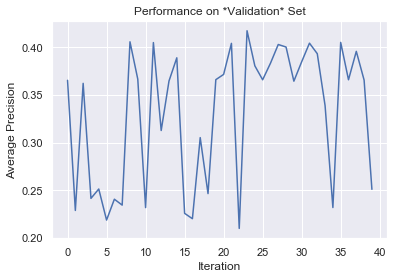

In [45]:
# Load model
svm_rbf_hp = joblib.load('saved_models/svm_rbf_hp.joblib')

# Calculate average precision
def print_save_ap(clf, model_name, X_test_pc, y_test, validation_plot=False):
    """
    Calculates, saves, and prints average precision score on test set; 
    optionally plot how average precision changed over iterations.
    """

    # Score classifier with the test data
    # Try if classifier supports probability
    try:
        y_score = clf.predict_proba(X_test_pc)[:,1]
    # If it doesn't, use its decision function
    except AttributeError:
        y_score = clf.decision_function(X_test_pc)
   
    # Calculate average precision
    ap_score = average_precision_score(y_test, y_score)
    
    # Save AP
    try:
        average_precision_hp[model_name] = ap_score
    # If dictionary to save AP doesn't exist yet, create it first
    except NameError:
        average_precision = {}
        average_precision[model_name] = ap_score
    
    # Print AP
    print('Best average precision score on *test* set: {}'.format(ap_score))
    
    
    # Plot AP, if specified
    if validation_plot:
        # Load progress file with validation performance
        progress_file_path = 'hp_progress/progress_' + model_name + '.csv'
        progress_file = pd.read_csv(progress_file_path)

        # Extract AP for each iteration
        ap = - progress_file.loss
        ap.plot()
        plt.title('Performance on *Validation* Set')
        plt.ylabel('Average Precision')
        plt.xlabel('Iteration');

print_save_ap(svm_rbf_hp, 'svm_rbf_hp', X_test_pc, y_test_s, validation_plot=True)

# OLD

##### With smaller subset of data

In [ ]:
svm_rbf_1 = SVC(kernel='rbf', probability=False, 
              cache_size=5000, class_weight='balanced')
# Parameters to search over
param_grid = {'C': np.logspace(-3, 3, 8),
              'gamma': np.logspace(-5, 1, 8)}
# Define indices for validation split (instead of proper cross-validation)
split_indices = ShuffleSplit(n_splits=1, test_size=.2, random_state=1)

svm_rbf_gs_1 = GridSearchCV(svm_rbf_1, param_grid=param_grid,
                          return_train_score=True,
                          scoring='average_precision', cv=split_indices)
svm_rbf_gs_1.fit(X_train_small, y_train_small)

# Save model
joblib.dump(svm_rbf_gs_1, 'saved_models/svm_rbf_gs_1.joblib')

In [ ]:
# Load model
svm_rbf_gs_1 = joblib.load('saved_models/svm_rbf_gs_1.joblib')

In [ ]:
# Prediction of class
y_pred_svm_rbf_1 = svm_rbf_gs_1.predict(X_test_small)

# Distance from separating hyperplane
y_pred_distance_svm_rbf_1 = svm_rbf_gs_1.decision_function(X_test_small)

# Save results
average_precision_1['SVM (RBF Kernel)'] = \
    average_precision_score(y_test_small, y_pred_distance_svm_rbf_1)

classification_reports_1['SVM (RBF Kernel)'] = \
    classification_report(y_test_small, y_pred_svm_rbf_1)

In [ ]:
gs_best_result(svm_rbf_gs_1)

In [ ]:
gs_heatmap(svm_rbf_gs_1) #, x_digits=1, x_scientific_notation=False)

In [ ]:
pd.DataFrame(svm_rbf_gs_1.cv_results_)

In [ ]:
average_precision_1

##### With more data

In [ ]:
svm_rbf_2 = SVC(kernel='rbf', probability=False, 
              cache_size=10000, class_weight='balanced')
# Parameters to search over
param_grid = {'C': np.logspace(-2, 3, 6),
              'gamma': np.logspace(-5, -1, 4)}
# Define indices for validation split (instead of proper cross-validation)
split_indices = ShuffleSplit(n_splits=1, random_state=1,
                             train_size=50000, test_size=1000)

svm_rbf_gs_2 = GridSearchCV(svm_rbf_2, param_grid=param_grid,
                          return_train_score=True, n_jobs=3,
                          scoring='average_precision', cv=split_indices)
svm_rbf_gs_2.fit(X_train, y_train)

# Save model
joblib.dump(svm_rbf_gs_2, 'saved_models/svm_rbf_gs_2.joblib')

In [ ]:
# Load model
svm_rbf_gs_2 = joblib.load('saved_model/svm_rbf_gs_2.joblib')

In [ ]:
# Prediction of class
y_pred_svm_rbf_2 = svm_rbf_gs_2.predict(X_test)

# Distance from separating hyperplane
y_pred_distance_svm_rbf_2 = svm_rbf_gs_2.decision_function(X_test)

# Save results
average_precision_2['SVM (RBF Kernel)'] = \
    average_precision_score(y_test, y_pred_distance_svm_rbf_2)

classification_reports_2['SVM (RBF Kernel)'] = \
    classification_report(y_test, y_pred_svm_rbf_2)

In [ ]:
gs_best_result(svm_rbf_gs_2)

In [ ]:
gs_heatmap(svm_rbf_gs_2, x_digits=1, x_scientific_notation=False)

In [ ]:
pd.DataFrame(svm_rbf_gs_2.cv_results_)

#### SVM with polynomial kernel 

##### With smaller subset of data

In [ ]:
svm_poly = SVC(kernel='poly', probability=False, gamma='auto',
              cache_size=5000, class_weight='balanced')
# Parameters to search over
param_grid = {'C': np.logspace(-3, 3, 8),
              'degree': [2,3,4]}
# Define indices for validation split (instead of proper cross-validation)
split_indices = ShuffleSplit(n_splits=1, test_size=.2, random_state=1)

svm_poly_gs = GridSearchCV(svm_poly, param_grid=param_grid,
                          return_train_score=True,
                          scoring='average_precision', cv=split_indices)
svm_poly_gs.fit(X_train_p, y_train)

In [ ]:
# Prediction of class
y_pred_svm_poly = svm_poly_gs.predict(X_test_p)

# Distance from separating hyperplane
y_pred_distance_svm_poly = svm_poly_gs.decision_function(X_test_p)

# Save results
average_precision['SVM (Polynomial Kernel)'] = \
    average_precision_score(y_test, y_pred_distance_svm_poly)

classification_reports['SVM (Polynomial Kernel)'] = \
    classification_report(y_test, y_pred_svm_poly)

In [ ]:
gs_heatmap(svm_poly_gs, x_scientific_notation=False)

In [ ]:
# Save model
joblib.dump(svm_poly_gs, 'svm_poly_gs.joblib')

## Performance comparison

In [ ]:
average_precision

In [ ]:
average_precision = 
plt.title('Impact of Dropping Columns on Classifier Performance')
plt.ylabel('Average Precision');